In [1]:
!pip install nltk scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

# Download required NLTK data
nltk.download('punkt')      # For word tokenization
nltk.download('punkt_tab')  # For sentence tokenization (newer requirement)
nltk.download('stopwords')  # For stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Sample document
document = """
The biting wind of the Ethiopian highlands whipped at Ayele's face as he hurried through the bustling streets of Bole, clutching a worn leather-bound 
book. March 25th, 2025, was a day of both hope and uncertainty for him, as he navigated the crowded marketplace towards the Ethiopian Airlines 
headquarters. He hoped to finally get a chance to speak to the CEO about his invention, a solar-powered water purifier that could solve the water 
scarcity issues plaguing many rural communities.
He pushed through the throng of vendors hawking their wares, the aroma of injera and spicy stews filling the air, a stark contrast to the dust 
and grit that clung to his worn clothes. He finally reached the airline's entrance, the imposing building a symbol of Ethiopia's progress, but also a 
reminder of the gap between the city and the countryside. He took a deep breath, the scent of coffee and hope filling his lungs, and stepped inside, 
ready to face the unknown.
"""

# Convert to lowercase
document = document.lower()

# Remove punctuation
document = document.translate(str.maketrans('', '', string.punctuation))

# Tokenize the text (split into words)
tokens = word_tokenize(document)

# Remove stopwords (common words like 'is', 'the', etc.)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['biting', 'wind', 'ethiopian', 'highlands', 'whipped', 'ayeles', 'face', 'hurried', 'bustling', 'streets', 'bole', 'clutching', 'worn', 'leatherbound', 'book', 'march', '25th', '2025', 'day', 'hope', 'uncertainty', 'navigated', 'crowded', 'marketplace', 'towards', 'ethiopian', 'airlines', 'headquarters', 'hoped', 'finally', 'get', 'chance', 'speak', 'ceo', 'invention', 'solarpowered', 'water', 'purifier', 'could', 'solve', 'water', 'scarcity', 'issues', 'plaguing', 'many', 'rural', 'communities', 'pushed', 'throng', 'vendors', 'hawking', 'wares', 'aroma', 'injera', 'spicy', 'stews', 'filling', 'air', 'stark', 'contrast', 'dust', 'grit', 'clung', 'worn', 'clothes', 'finally', 'reached', 'airlines', 'entrance', 'imposing', 'building', 'symbol', 'ethiopias', 'progress', 'also', 'reminder', 'gap', 'city', 'countryside', 'took', 'deep', 'breath', 'scent', 'coffee', 'hope', 'filling', 'lungs', 'stepped', 'inside', 'ready', 'face', 'unknown']


In [4]:
# Join tokens back into a single string for CountVectorizer
processed_text = ' '.join(filtered_tokens)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text into a word count matrix
word_count_matrix = vectorizer.fit_transform([processed_text])

# Get the words and their counts
words = vectorizer.get_feature_names_out()
counts = word_count_matrix.toarray()[0]

# Combine words and counts into a dictionary
word_freq = dict(zip(words, counts))

# Display the word frequencies
print("Word Frequencies:", word_freq)

Word Frequencies: {'2025': np.int64(1), '25th': np.int64(1), 'air': np.int64(1), 'airlines': np.int64(2), 'also': np.int64(1), 'aroma': np.int64(1), 'ayeles': np.int64(1), 'biting': np.int64(1), 'bole': np.int64(1), 'book': np.int64(1), 'breath': np.int64(1), 'building': np.int64(1), 'bustling': np.int64(1), 'ceo': np.int64(1), 'chance': np.int64(1), 'city': np.int64(1), 'clothes': np.int64(1), 'clung': np.int64(1), 'clutching': np.int64(1), 'coffee': np.int64(1), 'communities': np.int64(1), 'contrast': np.int64(1), 'could': np.int64(1), 'countryside': np.int64(1), 'crowded': np.int64(1), 'day': np.int64(1), 'deep': np.int64(1), 'dust': np.int64(1), 'entrance': np.int64(1), 'ethiopian': np.int64(2), 'ethiopias': np.int64(1), 'face': np.int64(2), 'filling': np.int64(2), 'finally': np.int64(2), 'gap': np.int64(1), 'get': np.int64(1), 'grit': np.int64(1), 'hawking': np.int64(1), 'headquarters': np.int64(1), 'highlands': np.int64(1), 'hope': np.int64(2), 'hoped': np.int64(1), 'hurried': np

In [5]:
# Sort words by frequency (descending order)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Print the top 5 most frequent words
print("Top 10 Most Frequent Words:")
for word, freq in list(sorted_word_freq.items())[:10]:
    print(f"{word}: {freq}")

Top 10 Most Frequent Words:
airlines: 2
ethiopian: 2
face: 2
filling: 2
finally: 2
hope: 2
water: 2
worn: 2
2025: 1
25th: 1


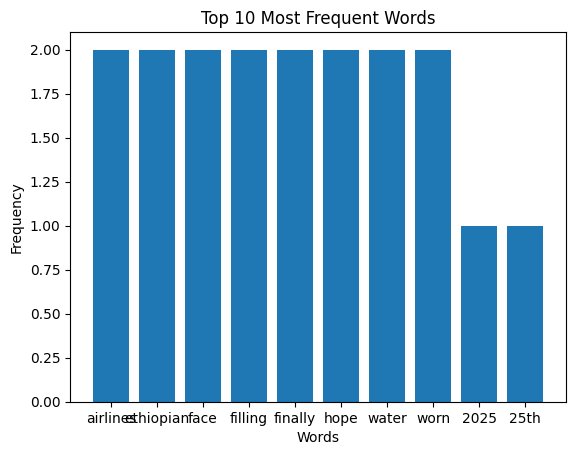

In [7]:
import matplotlib.pyplot as plt

# Get the top 5 words and their counts
top_words = list(sorted_word_freq.keys())[:10]
top_counts = list(sorted_word_freq.values())[:10]

# Create a bar chart
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()